# Forecasting the Cancer Mortality 

## Loading the Libraries and changing the wd 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import janitor
from prophet import Prophet
import os
# getting the work directory
os.getcwd()
# Setting work directory 
os.chdir("G:\\My Drive\\Projects\\smokingandcaner")

## Importing IARC data

In [2]:
mortality = pd.read_csv("datasets\\iarc\\japan\\mort.csv")
incidence = pd.read_csv("datasets\\iarc\\japan\\inc.csv")

In [3]:
mortality.head()

,Cancer id,Cancer label,Population id,Country label,Sex,Type,Year,ASR (World),Crude rate,Cumulative risk,Total
0,11,Lung,39200,Japan,1,1,1950,2.726817,1.943230,NaN,789
1,11,Lung,39200,Japan,1,1,1951,2.717393,1.955024,NaN,809
2,11,Lung,39200,Japan,1,1,1952,3.508694,2.576804,NaN,1084
3,11,Lung,39200,Japan,1,1,1953,3.895297,2.890989,NaN,1234
4,11,Lung,39200,Japan,1,1,1954,4.947312,3.697254,NaN,1599


In [4]:
incidence.head()

,Cancer id,Cancer label,Population id,Country label,Sex,Type,Year,ASR (World),Crude rate,Cumulative risk,Total
0,11,Lung,39200,Japan,1,0,1988,44.818478,55.141425,NaN,3361
1,11,Lung,39200,Japan,1,0,1989,43.384573,55.313858,NaN,3376
2,11,Lung,39200,Japan,1,0,1990,44.269127,58.155509,NaN,3558
3,11,Lung,39200,Japan,1,0,1991,43.517918,59.454762,NaN,3637
4,11,Lung,39200,Japan,1,0,1992,44.578997,63.006693,NaN,3858


In [5]:
## Merging the mortality and incidence datasets with respect to the year and sex 

total_epi = mortality.merge(incidence, how="outer", on=["Sex", "Year"], suffixes=("_mort", "_inc"))
total_epi.columns

Index(['Cancer id_mort', 'Cancer label_mort', 'Population id_mort',
       'Country label_mort', 'Sex', 'Type_mort', 'Year', 'ASR (World)_mort',
       'Crude rate_mort', 'Cumulative risk_mort', 'Total_mort',
       'Cancer id_inc', 'Cancer label_inc', 'Population id_inc',
       'Country label_inc', 'Type_inc', 'ASR (World)_inc', 'Crude rate_inc',
       'Cumulative risk_inc', 'Total_inc'],
      dtype='object')

In [6]:
total_epi = total_epi[['Country label_mort', 'Sex', 'Year', 
                       'ASR (World)_mort', 'Crude rate_mort', 
                       'Total_mort', 'ASR (World)_inc', 'Crude rate_inc', 
                       'Total_inc']]


In [7]:
total_epi = total_epi.clean_names()

##  Smoking Prevelance Data

In [8]:

smoking = pd.read_csv("datasets\\iarc\\japan\\smokingpre_updated.csv")
smoking.head()


,Year,sex,smoker
0,1965,1,82.3
1,1965,2,15.7
2,1966,1,83.7
3,1966,2,18.0
4,1967,1,82.3


In [9]:
# renaming the Gender column with sex in smoking dataframe
smoking.rename(columns = {"Year":"year"}, inplace = True)

In [10]:
total_epi = total_epi.merge(smoking, how="outer", on=["sex", "year"])


In [11]:
# making the year variable as a datetime variable
total_epi['year'] = pd.to_datetime(total_epi['year'], format='%Y')

In [12]:
total_epi.columns

Index(['country_label_mort', 'sex', 'year', 'asr_world_mort',
       'crude_rate_mort', 'total_mort', 'asr_world_inc', 'crude_rate_inc',
       'total_inc', 'smoker'],
      dtype='object')

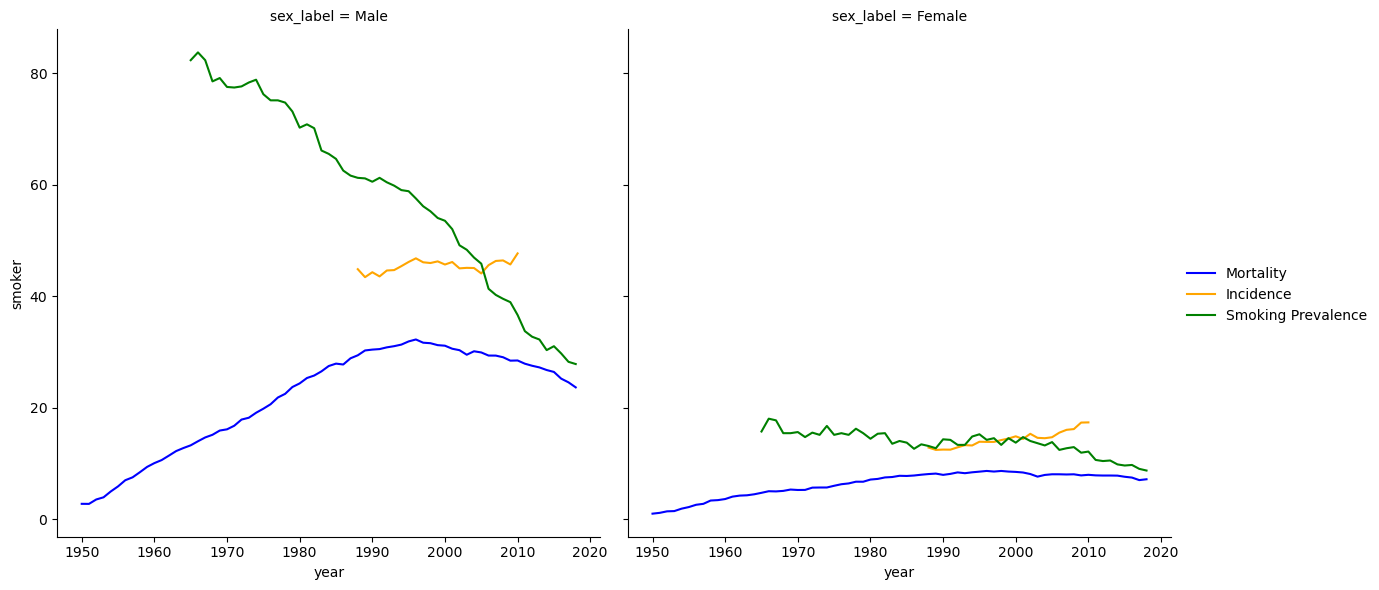

In [13]:
# Replace sex values with labels
total_epi['sex_label'] = total_epi['sex'].replace({1: 'Male', 2: 'Female'})

# Create a FacetGrid object with year as the x-axis and sex_label as the column
g = sns.FacetGrid(total_epi, col='sex_label', height=6)

# Plot mortality, incidence, and smoking prevalence against year for each sex
g.map(sns.lineplot, 'year', 'asr_world_mort', color='blue', label="Mortality")
g.map(sns.lineplot, 'year', 'asr_world_inc', color='orange', label="Incidence")
g.map(sns.lineplot, 'year', 'smoker', color='green', label="Smoking Prevalence")

# Add legend to the plot
g.add_legend()

# Show the plot
plt.show()

# forecasting smoking prevelance for each gender until 2040

11:51:31 - cmdstanpy - INFO - Chain [1] start processing
11:51:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hajam\AppData\Local\Temp\ipykernel_13976\336749852.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_forecast['sex'] = np.where(future_forecast['ds'].dt.year <= male_data['ds'].dt.year.max(), 1, 2)


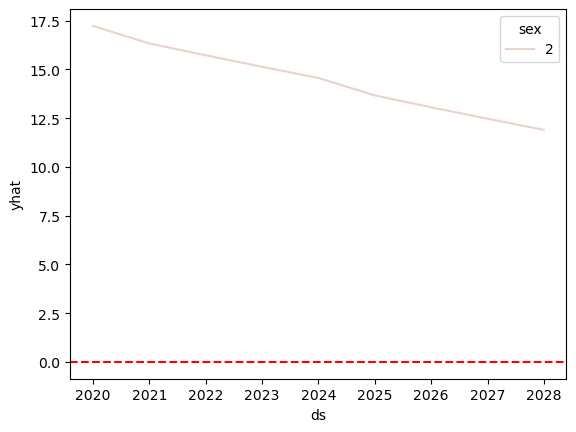

In [20]:
from prophet import Prophet

# creating a subdataframe
pre_smoke_male = total_epi.loc[total_epi['sex'] == 1, ['year', 'smoker']]

# dropping the NA
pre_smoke_male.dropna(inplace=True)

#importng prophet package
import prophet

data = pre_smoke_male.rename(columns={'year': 'ds', 'smoker': 'y'})


data['ds'] = pd.to_datetime(data['ds'], format='%Y')


# Step 4: Create a Prophet model
model = Prophet()
model.fit(data)

# Step 5: Make predictions
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)



# Doing Simple Forecasting Using ARIMA

In [ ]:
forecasting_male = total_epi.loc[total_epi['sex'] == 1, ['asr_world_mort', 'year']].set_index('year')
forecasting_male.dropna(inplace=True)

In [ ]:
model = ARIMA(forecasting_male, order=(1, 1, 1))


c:\Users\hajam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hajam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hajam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()


c:\Users\hajam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast = results.forecast(steps=32)


<Figure size 1200x600 with 0 Axes>

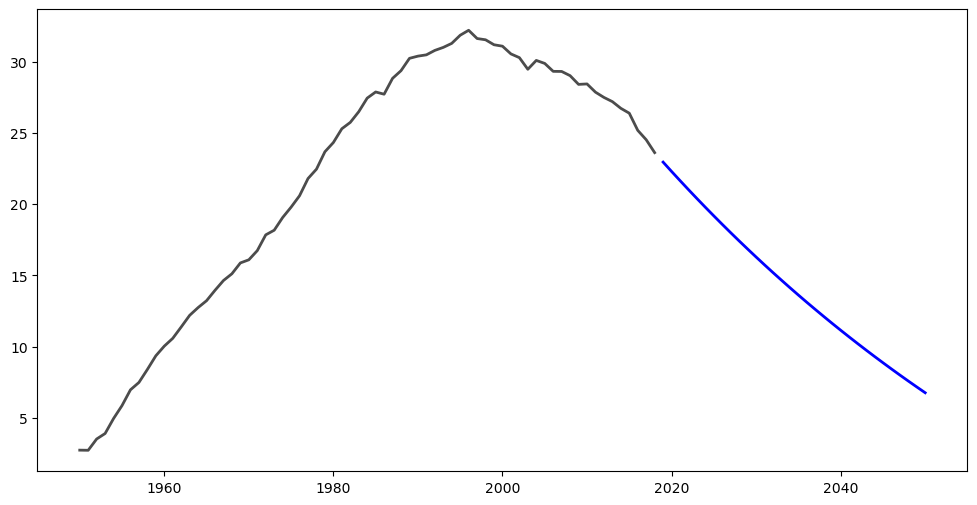

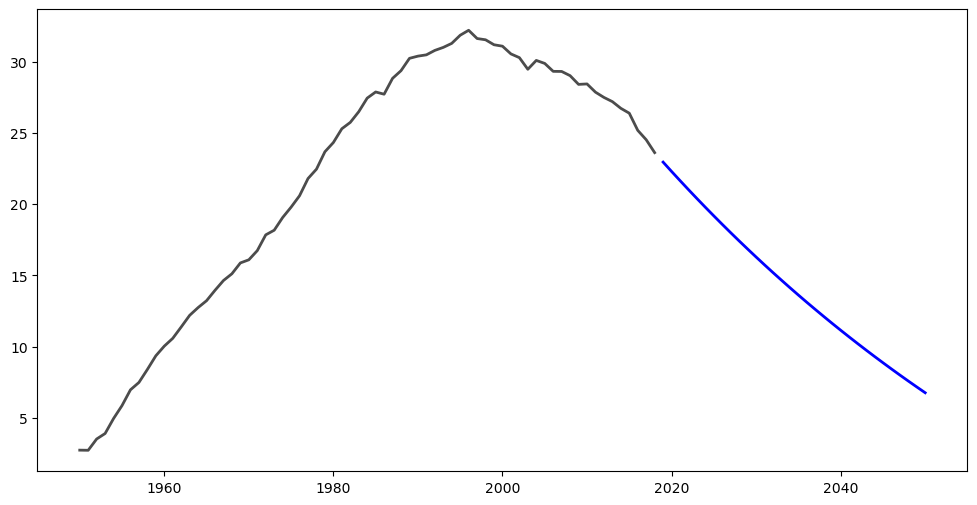

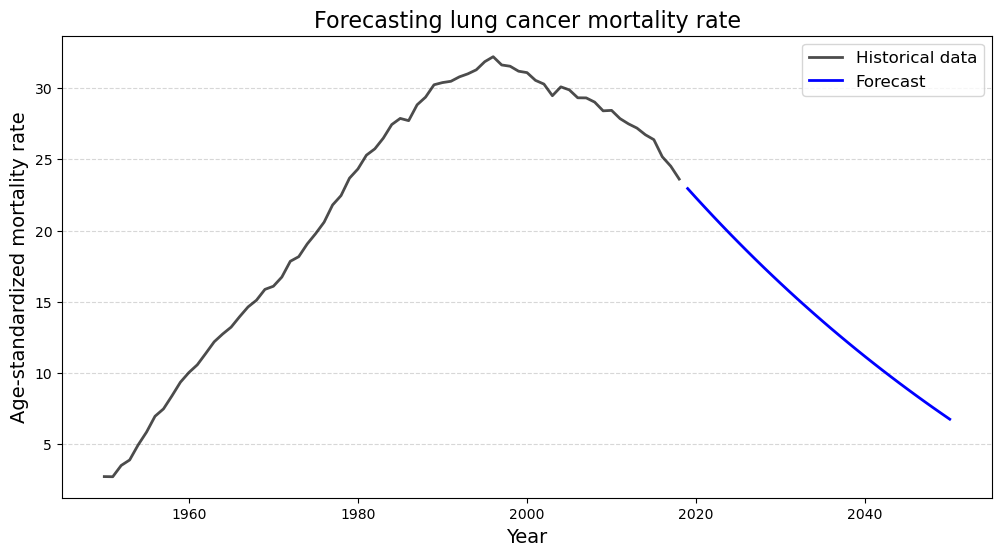

In [ ]:
forecast = results.forecast(steps=32)


# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(forecasting_male, label='Historical data', color='black', alpha=0.7, linewidth=2)
plt.plot(forecast, label='Forecast', color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age-standardized mortality rate', fontsize=14)
plt.title('Forecasting lung cancer mortality rate', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Using XGBOOST 

In [ ]:
xgboost_data = total_epi[['asr_world_mort', 'asr_world_inc','sex', 'smoker', 'year']]

# exchange the values of the sex with male and female while 1 and 2 respectively
xgboost_data = pd.get_dummies(xgboost_data, columns=['sex'])


# splitting the data
X = xgboost_data.drop(['asr_world_mort'], axis=1) # features
y = xgboost_data['asr_world_mort'] # target variable

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

xgb_model.fit(X, y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Create a new dataframe with year sequance from 2018 to 2050
# sex_1 = 1, sex_2 = 0